In [1]:
!pip install numpy
!pip install matplotlib
!pip install sympy

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

random.seed(int('0xC0FFEE', 16))
np.random.seed(int('0xC0FFEE', 16))
PI = math.pi

## Numpy data load




In [3]:
### np.savez('./filename.npz', x=X, y=Y)

practice1_data = np.load('./practice1_data.npz')
print(f'Check key values: {practice1_data.files}')
X, Y = practice1_data['x'], practice1_data['y']
print(X.shape, Y.shape)
print(X[0:10], Y[0:10])

Check key values: ['x', 'y']
(1000,) (1000,)
[160.86429835 174.97366162 173.9137621  163.800405   190.03698413
 166.23929116 186.3450603  177.38916332 166.12647418 169.35983898] [1. 0. 0. 1. 0. 1. 0. 0. 0. 1.]


# Practice 1
평균, 시그마가 정해진 두 개의 클래스에서 1차원 데이터를 샘플링해서, 히스토그램과 확률분포 함수를 각각 그려보시오.

In [4]:
def show_histogram(A, B):
    plt.hist(A, label='a', alpha=0.5)
    plt.hist(B, label='b', alpha=0.5)
    plt.legend(loc='upper left')
    plt.show()

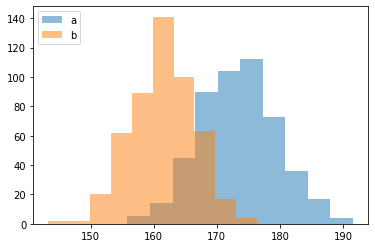

In [5]:
show_histogram(X[Y==0], X[Y==1])

In [6]:
def pdf(x, mean, std):
    return (1 / (std * np.sqrt(PI * 2))) * np.exp(-(1 / 2) * ((x - mean) / std) * ((x - mean) / std))

In [7]:
def show_pdf(x, Y_A, Y_B):
    plt.plot(x, Y_A, color='red', label='A')
    plt.plot(x, Y_B, color='blue', label='B')

    plt.legend(loc='upper left')
    plt.xlabel("$x$")
    plt.ylabel("$p(x)$")
    plt.show()

In [8]:
x = np.linspace(140, 200, 1000)
Y_A = pdf(x, np.mean(X[Y==0]), np.std(X[Y==0]))
Y_B = pdf(x, np.mean(X[Y==1]), np.std(X[Y==1]))

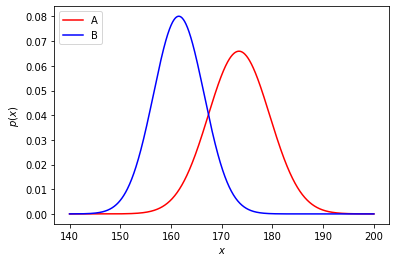

In [9]:
show_pdf(x, Y_A, Y_B)

# Practice 2

추가적으로 테스트 데이터를 샘플링해서, likelihood값만을 이용하는 경우, prior값과 결합하여 posterior로 볼 경우 각각에 대하여 분류 정확도를 보고하고 

(a) likelihood 함수를 그리고, 

(b) prior 적용 시, likelihood x prior 함수를 그리고,

(c) posterior =  likelihood x prior / p(x) 를 그리시오. 

prior의 변화에 따라 decision point를 그래프에서 대략적으로 읽고, prior에 따라서 분류 결과가 어떻게 변화하는지 설명하시오.

In [10]:
practice2_train = np.load('./practice2_train.npz')
print(f'Check key values: {practice2_train.files}')
X_train, Y_train = practice2_train['x'], practice2_train['y']
print(X_train.shape)

Check key values: ['x', 'y']
(1000,)


In [11]:
practice2_test = np.load('./practice2_test.npz')
print(f'Check key values: {practice2_test.files}')
X_test, Y_test = practice2_test['x'], practice2_test['y']
print(X_test.shape)

Check key values: ['x', 'y']
(100,)


In [12]:
def get_likelihood(x, A_mean, A_std, B_mean, B_std):
    return pdf(x, A_mean, A_std), pdf(x, B_mean, B_std)

In [13]:
def get_prior(A, B):
    prior_A = len(A)/ (len(A) + len(B))
    return (prior_A), (1 - prior_A)

In [14]:
def get_posterior(x, A_likelihood, B_likelihood, A_prior, B_prior):
    evidence = (A_likelihood * A_prior) + (B_likelihood * B_prior)
                 
    return A_likelihood * A_prior / evidence, B_likelihood * B_prior / evidence

In [15]:
def get_accuracy(Y_test, A_prob, B_prob):
    y_pred = np.where(A_prob > B_prob, 0, 1)

    return len(np.where(y_pred == Y_test)[0]) / len(y_pred)

Acc: 0.86


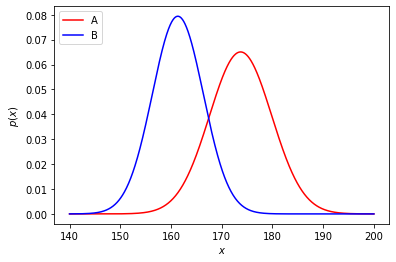

[140.         140.06006006 140.12012012 140.18018018 140.24024024
 140.3003003  140.36036036 140.42042042 140.48048048 140.54054054
 140.6006006  140.66066066 140.72072072 140.78078078 140.84084084
 140.9009009  140.96096096 141.02102102 141.08108108 141.14114114
 141.2012012  141.26126126 141.32132132 141.38138138 141.44144144
 141.5015015  141.56156156 141.62162162 141.68168168 141.74174174
 141.8018018  141.86186186 141.92192192 141.98198198 142.04204204
 142.1021021  142.16216216 142.22222222 142.28228228 142.34234234
 142.4024024  142.46246246 142.52252252 142.58258258 142.64264264
 142.7027027  142.76276276 142.82282282 142.88288288 142.94294294
 143.003003   143.06306306 143.12312312 143.18318318 143.24324324
 143.3033033  143.36336336 143.42342342 143.48348348 143.54354354
 143.6036036  143.66366366 143.72372372 143.78378378 143.84384384
 143.9039039  143.96396396 144.02402402 144.08408408 144.14414414
 144.2042042  144.26426426 144.32432432 144.38438438 144.44444444
 144.50450

In [16]:
A_likelihood, B_likelihood = get_likelihood(X_test, 
                                np.mean(X_train[Y_train==0]),
                                np.std(X_train[Y_train==0]),
                                np.mean(X_train[Y_train==1]),
                                np.std(X_train[Y_train==1]))

y_pred = np.where(A_likelihood > B_likelihood, 0, 1)

print(f'Acc: {get_accuracy(Y_test, A_likelihood, B_likelihood)}')

graph_x = np.linspace(140, 200, 1000)
A_graph_x, B_graph_x = get_likelihood(graph_x, 
                                np.mean(X_train[Y_train==0]),
                                np.std(X_train[Y_train==0]),
                                np.mean(X_train[Y_train==1]),
                                np.std(X_train[Y_train==1]))
show_pdf(graph_x, A_graph_x, B_graph_x)
print(graph_x)

0.25 0.75
Acc: 0.83


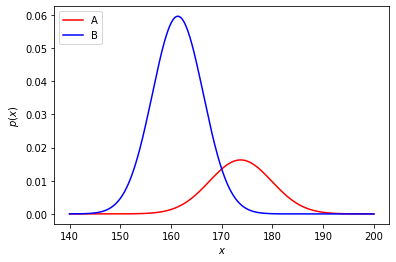

In [17]:
A_prior, B_prior = get_prior(X_train[Y_train==0], X_train[Y_train==1])

print(A_prior, B_prior)

print(f'Acc: {get_accuracy(Y_test, A_likelihood * A_prior, B_likelihood * B_prior)}')

show_pdf(graph_x, A_graph_x * A_prior, B_graph_x * B_prior)

Acc: 0.83


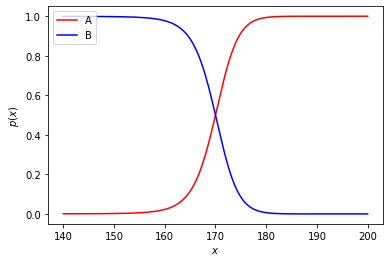

In [18]:
A_prob, B_prob = get_posterior(X_test, A_likelihood, B_likelihood, A_prior, B_prior)

print(f'Acc: {get_accuracy(Y_test, A_prob, B_prob)}')

A_graph_prob, B_graph_prob = get_posterior(X_test, A_graph_x, B_graph_x, A_prior, B_prior)


show_pdf(graph_x, A_graph_prob, B_graph_prob)

- prior_A: 0.5
- prior_B: 0.5

In [19]:
A_prob, B_prob = get_posterior(X_test, A_likelihood, B_likelihood, 0.5, 0.5)

print(f'Acc: {get_accuracy(Y_test, A_prob, B_prob)}')

Acc: 0.86


- prior_A: 0.4
- prior_B: 0.6

In [20]:
A_prob, B_prob = get_posterior(X_test, A_likelihood, B_likelihood, 0.4, 0.6)

print(f'Acc: {get_accuracy(Y_test, A_prob, B_prob)}')

Acc: 0.86


- prior_A: 0.25
- prior_B: 0.75

In [21]:
A_prob, B_prob = get_posterior(X_test, A_likelihood, B_likelihood, 0.25, 0.75)

print(f'Acc: {get_accuracy(Y_test, A_prob, B_prob)}')

Acc: 0.83


# Question 1

위에서 prior probability를 0.5:0.5에서 0.25:0.75로 변화시키면서 Bayesian 분류기의 분류 정확도를 평가하였다.
세가지 경우에서 점점 정확도가 떨어지는 이유에 대하여 설명하시오. 

답 : prior probability는 사전 확률이다. 이 때 사전 확률의 값을 치우치게 가지게 될 수록 분류 정확도는 떨어질 것으로 예측할 수 있다.
정확도 입장에서도, prior probability가 갈수록 더 치우치게 되면서, 정확도가 떨어지게 된다.





# Practice 3
두 클래스의 평균 사이의 거리를 점차 증가시키면서 train, test 데이터를 샘플링하여 Bayesian 분류기의 정확도를 계산해보시오.

s = 3
mu = (-1, 1), (-2, 2), (-3, 3)
train / test sampling - report performance

In [22]:
def get_data(num_data, ratio, A_mean, A_std, B_mean, B_std):

    num_data_A = int(num_data * ratio)
    num_data_B = num_data - num_data_A
   
    A = np.random.normal(loc=A_mean, scale=A_std, size=num_data_A)
  
    B = np.random.normal(loc=B_mean, scale=B_std, size=num_data_B)
    label_zeros = np.zeros((num_data_A, 1))
    label_ones = np.ones((num_data_B, 1))
    
    return A, B, label_zeros, label_ones

In [23]:
# Train data
train_A, train_B, _, _ = get_data(1000, 0.5, -1, 3, 1, 3)
# Test data
test_A, test_B, test_YA, test_YB = get_data(100, 0.5, -1, 3, 1, 3)
test_X = np.concatenate((test_A, test_B))
test_Y = np.concatenate((test_YA, test_YB)).reshape(-1)

Acc: 0.62


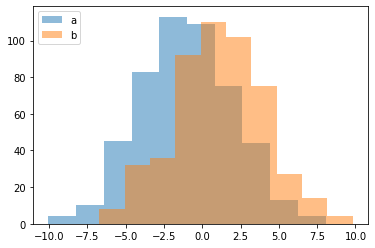

개수: (500, 500)


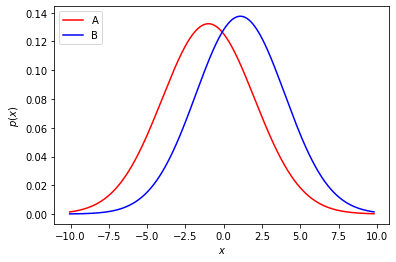

In [24]:
A_likelihood, B_likelihood = get_likelihood(test_X, 
                                np.mean(train_A),
                                np.std(train_A),
                                np.mean(train_B),
                                np.std(train_B))
A_prior, B_prior = get_prior(train_A, train_B)
A_prob, B_prob = get_posterior(test_X, A_likelihood, B_likelihood, A_prior, B_prior)
print(f'Acc: {get_accuracy(test_Y, A_prob, B_prob)}')
show_histogram(train_A, train_B)

print(f'개수: {len(train_A),len(train_B)}')
#Todo practice 4
#train_A와 train_B 값 중 최대와 최소를 구한다.
sort_train_A = sorted(train_A)
sort_train_B = sorted(train_B)
if(sort_train_A[0] < sort_train_B[0]):
    X_min = sort_train_A[0]
else:
    X_min = sort_train_B[0]
    
if(sort_train_A[len(sort_train_A)-1] < sort_train_B[len(sort_train_B)-1]):
    X_max = sort_train_B[len(sort_train_B)-1]
else:
    X_max = sort_train_A[len(sort_train_A)-1]
#최대 최소와 맞게 1000개로 np.linspace를 한다.
train_X = np.linspace(X_min,X_max,1000)
#train_X_A와 train_X_B 에 A와 B의 범위에 맞도록 설정한다.
train_X_A = np.linspace(sort_train_A[0],sort_train_A[len(sort_train_A)-1],1000)
train_X_B = np.linspace(sort_train_B[0],sort_train_B[len(sort_train_B)-1],1000)
#pdf함수를 불러서 값을 저장한다.
Y_A = pdf(train_X, np.mean(train_A),np.std(train_A))
Y_B = pdf(train_X, np.mean(train_B),np.std(train_B))
#show_pdf함수를 불러서 pdf를 출력한다.
show_pdf(train_X,Y_A, Y_B)

In [25]:
# Train data
train_A, train_B, _, _ = get_data(1000, 0.5, -2, 3, 2, 3)
# Test data
test_A, test_B, test_YA, test_YB = get_data(100, 0.5, -2, 3, 2, 3)
test_X = np.concatenate((test_A, test_B))
test_Y = np.concatenate((test_YA, test_YB)).reshape(-1)

Acc: 0.72


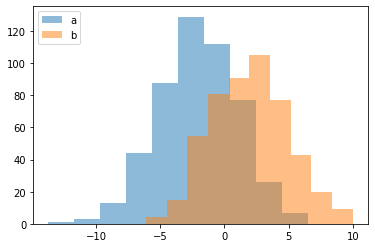

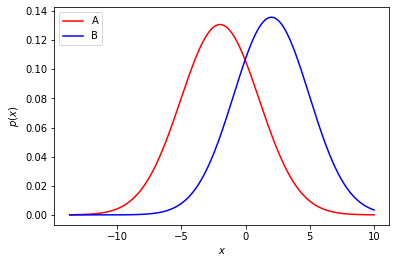

In [26]:
A_likelihood, B_likelihood = get_likelihood(test_X, 
                                np.mean(train_A),
                                np.std(train_A),
                                np.mean(train_B),
                                np.std(train_B))



A_prior, B_prior = get_prior(train_A, train_B)
A_prob, B_prob = get_posterior(test_X, A_likelihood, B_likelihood, A_prior, B_prior)
print(f'Acc: {get_accuracy(test_Y, A_prob, B_prob)}')
show_histogram(train_A, train_B)

#Todo 위와 주석 동일
sort_train_A = sorted(train_A)
sort_train_B = sorted(train_B)


if(sort_train_A[0] < sort_train_B[0]):
    X_min = sort_train_A[0]
else:
    X_min = sort_train_B[0]
    
if(sort_train_A[len(sort_train_A)-1] < sort_train_B[len(sort_train_B)-1]):
    X_max = sort_train_B[len(sort_train_B)-1]
else:
    X_max = sort_train_A[len(sort_train_A)-1]
train_X = np.linspace(X_min,X_max,1000)
train_X_A = np.linspace(sort_train_A[0],sort_train_A[len(sort_train_A)-1],1000)
train_X_B = np.linspace(sort_train_B[0],sort_train_B[len(sort_train_B)-1],1000)

Y_A = pdf(train_X, np.mean(train_A),np.std(train_A))
Y_B = pdf(train_X, np.mean(train_B),np.std(train_B))
show_pdf(train_X,Y_A, Y_B)

In [27]:
# Train data
train_A, train_B, _, _ = get_data(1000, 0.5, -3, 3, 3, 3)
# Test data
test_A, test_B, test_YA, test_YB = get_data(100, 0.5, -3, 3, 3, 3)
test_X = np.concatenate((test_A, test_B))
test_Y = np.concatenate((test_YA, test_YB)).reshape(-1)

Acc: 0.87


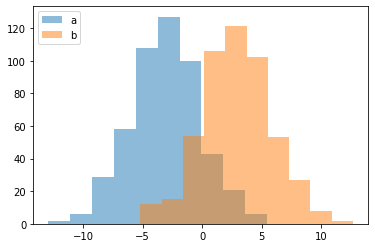

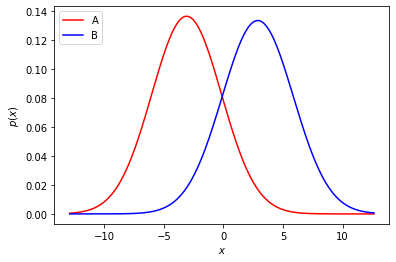

500


In [28]:
A_likelihood, B_likelihood = get_likelihood(test_X, 
                                np.mean(train_A),
                                np.std(train_A),
                                np.mean(train_B),
                                np.std(train_B))
A_prior, B_prior = get_prior(train_A, train_B)
A_prob, B_prob = get_posterior(test_X, A_likelihood, B_likelihood, A_prior, B_prior)
print(f'Acc: {get_accuracy(test_Y, A_prob, B_prob)}')
show_histogram(train_A, train_B)

#Todo 위와 주석 동일
sort_train_A = sorted(train_A)
sort_train_B = sorted(train_B)

if(sort_train_A[0] < sort_train_B[0]):
    X_min = sort_train_A[0]
else:
    X_min = sort_train_B[0]
    
if(sort_train_A[len(sort_train_A)-1] < sort_train_B[len(sort_train_B)-1]):
    X_max = sort_train_B[len(sort_train_B)-1]
else:
    X_max = sort_train_A[len(sort_train_A)-1]
train_X = np.linspace(X_min,X_max,1000)

train_X_A = np.linspace(sort_train_A[0],sort_train_A[len(sort_train_A)-1],1000)
train_X_B = np.linspace(sort_train_B[0],sort_train_B[len(sort_train_B)-1],1000)

Y_A = pdf(train_X, np.mean(train_A),np.std(train_A))
Y_B = pdf(train_X, np.mean(train_B),np.std(train_B))
show_pdf(train_X,Y_A, Y_B)


print(len(train_B))


# Practice 4

Practice 3에서 그린 세 개의 히스토그램을 probability density function으로 그리시오.



In [29]:
#3번에 구현

# Practice 5

두 클래스의 데이터가 다음과 같은 Gaussian 분포를 따른다고 할 때, 아래 설명에 따라 Bayesian 분류기의 분류 정확도를 계산하시오. 

A class : mu = -1, s = 3
B class : mu = 3, s = 2

a) P(A)=P(B)일 때, p(x|A), p(x|B), P(A|x), P(B|x)를 그리시오.

b) P(A)=1/3, P(B)=2/3일 때, p(x|A), p(x|B), P(A|x), P(B|x)를 그리시오.

c) a)와 b)에서 구한 p(A|x)=p(B|x)을 풀면 decision point를 구할 수 있다. 각 decision point를 구하여 a)와 b)에서 그린 그래프 위에 표시하시오. 

d) Decision point를 구한 후에 Bayesian 분류기의 분류 방법이 어떻게 간단히 변화할 수 있는지 설명하시오.

e) test set을 A, B 클래스에 대하여 각 100개씩 샘플링하여, d)에서 설명한 방법으로 분류 정확도를 구하시오. 단, P(A)=P(B)



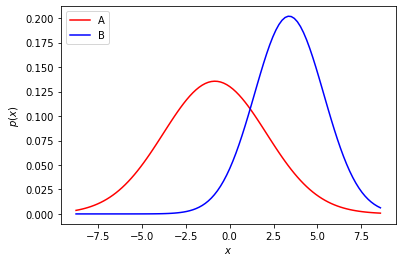

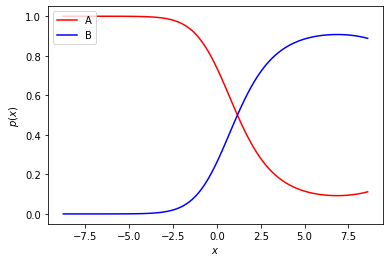

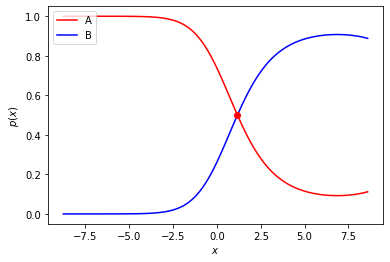

In [79]:
#a)
#문제에 맞게 데이터를 생성해서 불러온다.
test_A, test_B, test_YA, test_YB = get_data(100, 0.5, -1, 3, 3, 2)
test_X = np.concatenate((test_A, test_B))

# p(x|A) p(x|B)likelihood
#범위에 맞게 x값을 설정한다.
x = np.linspace(min(test_X),max(test_X),100)
#likelihood의 값을 get_likelihood를 불러서 설정한다.
A_likelihood ,B_likelihood= get_likelihood(x,np.mean(test_A),np.std(test_A),np.mean(test_B),np.std(test_B))
#이 값을 토대로 pdf를 그린다.
show_pdf(x,A_likelihood,B_likelihood)

#p(A|x), p(B|x) posterior probability
#우선 get_prior 함수를 통해서 A와 B의 prior 값을 구한다.
A_prior, B_prior = get_prior(test_A, test_B)
#get_posterior 값을 통해서 A와 B의 posterior 값을 저장한다.
A_prob, B_prob = get_posterior(test_X, A_likelihood, B_likelihood, A_prior, B_prior)
#이 값을 토대로 pdf를 그린다.
show_pdf(x, A_prob, B_prob)

#)c
#pdf 함수를 통해서 방정식의 근을 구한다. 식을 정리한 후, x^2의 계수를 eq_a, x의 계수를 eq_b, 상수항을 eq_c로 표현하였다.
eq_a = (np.std(test_B)**2) - (np.std(test_A)**2)
eq_b = (-2)*((np.mean(test_A)*(np.std(test_B)**2)) - (np.mean(test_B)*(np.std(test_A)**2)))
eq_c = ((np.mean(test_A)*np.std(test_B))**2) - ((np.mean(test_B)*np.std(test_A))**2) - (2*(np.std(test_A)**2)*(np.std(test_B)**2)*np.log(np.std(test_B)/np.std(test_A)))
#주어진 값을 통해서 범위 안에 존재하는 근을 근의 공식을 통해서 구한다.

if ((((((-1)*eq_b)+math.sqrt((eq_b**2)-(4*eq_a*eq_c)))/(2*eq_a)) >min(test_X)) and ((((-1)*eq_b+math.sqrt((eq_b**2)-(4*eq_a*eq_c)))/(2*eq_a))<max(test_X))):
    result = ((((-1)*eq_b)+math.sqrt((eq_b**2)-(4*eq_a*eq_c)))/(2*eq_a))
else:
    result = ((((-1)*eq_b)-math.sqrt((eq_b**2)-(4*eq_a*eq_c)))/(2*eq_a))
    
#y의 값을 pdf 공식에 대입해서 찾는다. 
y = (1 / (np.std(test_A) * np.sqrt(PI * 2))) * np.exp(-(1 / 2) * ((result - np.mean(test_A)) / np.std(test_A)) * ((result - np.mean(test_A)) / np.std(test_A)))


#A_prob와 B_prob를 다시 그린다.

plt.plot(x,A_prob, color='red', label='A')
plt.plot(x,B_prob, color='blue', label='B')
#decision point를 찍는다.
plt.plot(result,A_prior,'ro')
plt.legend(loc='upper left')
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.show()





33


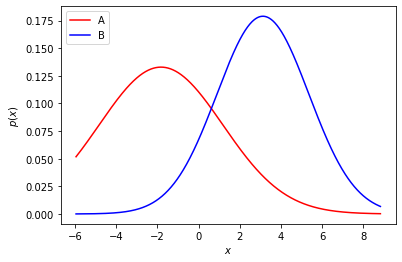

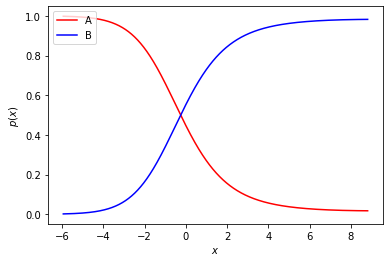

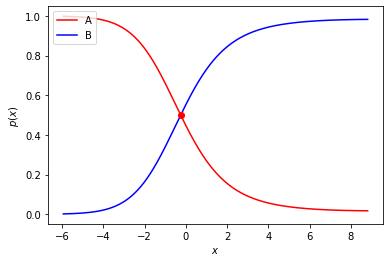

In [78]:
#b)
#문제에 맞게 데이터를 생성해서 불러온다.
test_A, test_B, test_YA, test_YB = get_data(100, 1/3, -1, 3, 3, 2)
test_X = np.concatenate((test_A, test_B))
# p(x|A) p(x|B)likelihood
#범위에 맞게 x값을 설정한다.
x = np.linspace(min(test_X),max(test_X),1000)
#likelihood의 값을 get_likelihood를 불러서 설정한다.
A_likelihood ,B_likelihood= get_likelihood(x,np.mean(test_A),np.std(test_A),np.mean(test_B),np.std(test_B))
#이 값을 토대로 pdf를 그린다.
show_pdf(x,A_likelihood,B_likelihood)

#p(A|x), p(B|x) posterior probability
#우선 get_prior 함수를 통해서 A와 B의 prior 값을 구한다.
A_prior, B_prior = get_prior(test_A, test_B)
#get_posterior 값을 통해서 A와 B의 posterior 값을 저장한다.
A_prob, B_prob = get_posterior(test_X, A_likelihood, B_likelihood, A_prior, B_prior)
#이 값을 토대로 pdf를 그린다.
show_pdf(x, A_prob, B_prob)

#)c
#pdf 함수를 통해서 방정식의 근을 구한다. 식을 정리한 후, x^2의 계수를 eq_a, x의 계수를 eq_b, 상수항을 eq_c로 표현하였다.
eq_a = (np.std(test_B)**2) - (np.std(test_A)**2)
eq_b = (-2)*((np.mean(test_A)*(np.std(test_B)**2)) - (np.mean(test_B)*(np.std(test_A)**2)))
eq_c = ((np.mean(test_A)*np.std(test_B))**2) - ((np.mean(test_B)*np.std(test_A))**2) - (2*(np.std(test_A)**2)*(np.std(test_B)**2)*np.log((np.std(test_B)*A_prior)/(np.std(test_A)*B_prior)))
#주어진 값을 통해서 범위 안에 존재하는 근을 근의 공식을 통해서 구한다.

if ((((((-1)*eq_b)+math.sqrt((eq_b**2)-(4*eq_a*eq_c)))/(2*eq_a)) >min(test_X)) and ((((-1)*eq_b+math.sqrt((eq_b**2)-(4*eq_a*eq_c)))/(2*eq_a))<max(test_X))):
    result = ((((-1)*eq_b)+math.sqrt((eq_b**2)-(4*eq_a*eq_c)))/(2*eq_a))
else:
    result = ((((-1)*eq_b)-math.sqrt((eq_b**2)-(4*eq_a*eq_c)))/(2*eq_a))
#y의 값을 pdf 공식에 대입해서 찾는다. 
y = (1 / (np.std(test_A) * np.sqrt(PI * 2))) * np.exp(-(1 / 2) * ((result - np.mean(test_A)) / np.std(test_A)) * ((result - np.mean(test_A)) / np.std(test_A)))

y = 0.5
A_likelihood ,X_likelihood= get_likelihood(x,np.mean(test_A),np.std(test_A),np.mean(test_X),np.std(test_X))
A_prob1, X_prob1 = get_posterior(result, A_likelihood, X_likelihood, A_prior, X_prior)
#A_prob와 B_prob를 다시 그린다.
plt.plot(x,A_prob, color='red', label='A')
plt.plot(x,B_prob, color='blue', label='B')
#decision point를 찍는다.
plt.plot(result,y,'ro')
plt.legend(loc='upper left')
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.show()





In [32]:
#c) a와 b의 밑부분에 구현하였습니다.

In [35]:
#d)decision point를 구한 후에는 이 point를 기준으로 classify 할 수 있기 때문에 이를 이용하면 더 쉽게 값을 분류할 수 있다.

#e)
# Train data
train_A, train_B, _, _ = get_data(1000, 0.5, -1, 3, 3, 2)
# Test data
test_A, test_B, test_YA, test_YB = get_data(100, 0.5, -1, 3, 3, 2)
test_X = np.concatenate((test_A, test_B))
test_Y = np.concatenate((test_YA, test_YB)).reshape(-1)
#posterior 함수를 불러서 A_prob와 B_prob를 구한다.
A_prob, B_prob = get_posterior(X_test, A_likelihood, B_likelihood, A_prior, B_prior)
#이를 이용해서 정확도를 구한다.
print(f'Acc: {get_accuracy(test_Y, A_prob, B_prob)}')

Acc: 0.9
